## 84 pandas缺失值/空值处理（七）
### interpolate 使用插值方法填充nan
参数 method='linear', axis=0, limit=None, inplace=False, limit_direction=None, limit_area=None, downcast=None, **kwargs

### 创建数据

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))
df

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,NaN,4.0,-4.0,16.0


In [14]:
df.interpolate(method='linear',limit_area='outside')

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,2.0,4.0,-4.0,16.0


In [15]:
df.interpolate(method='linear',limit_area='inside') # 通过与以上两个对比 limit_area 作用，决定 nan区域与非nan区域“环绕”时如何填充。详见官方文档

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,1.0,2.0,-2.0,5.0
2,2.0,3.0,-3.0,9.0
3,NaN,4.0,-4.0,16.0


In [10]:
df.interpolate(method='linear',limit=1,limit_direction='forward') # 沿着 limit=1,limit_direction='forward' 参数类似 fillna的 ，与method 配合使用

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,1.0,2.0,-2.0,5.0
2,2.0,3.0,NaN,9.0
3,2.0,4.0,-4.0,16.0


In [6]:
df.interpolate(axis=1) # 沿着axis=1 水平方向

,a,b,c,d
0,0.0,-0.5,-1.0,1.0
1,NaN,2.0,2.0,2.0
2,2.0,3.0,6.0,9.0
3,NaN,4.0,-4.0,16.0


In [3]:
df.interpolate() # 一个简单的。观察数据变化，默认 线性插值

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,1.0,2.0,-2.0,5.0
2,2.0,3.0,-3.0,9.0
3,2.0,4.0,-4.0,16.0


<AxesSubplot:>

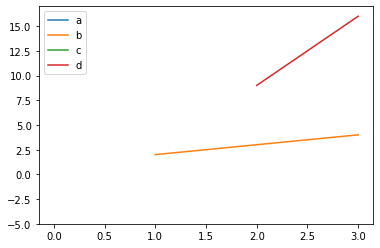

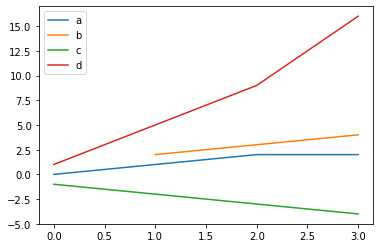

In [5]:
df.plot();df.interpolate().plot() # 上下两个图，统一对比插值效果。这里用到 plot，作图

In [20]:
df.interpolate(downcast='infer') # 错误提示给出参数，infer 推断结果可能的转换类型

,a,b,c,d
0,0,NaN,-1,1
1,1,2.0,-2,5
2,2,3.0,-3,9
3,2,4.0,-4,16


In [23]:
df.interpolate(method='akima',order=1) # s使用的scipy中的特殊插值函数。详细参考相关文档

,a,b,c,d
0,0.0,NaN,-1.000000,1.00
1,0.0,2.0,-2.333333,4.25
2,2.0,3.0,-3.333333,9.00
3,NaN,4.0,-4.000000,16.00
